In [ ]:
using Pkg
Pkg.activate("NB02")
Pkg.update()

In [ ]:
using MLDatasets, Plots, Images, LinearAlgebra

# Der MNIST Datensatz

Wir laden den MNIST Datensatz. 

In [3]:
X, Y = MNIST()[:];

In [4]:
Y[1:5], length(Y)

([5, 0, 4, 1, 9], 60000)

**Frage:** Betrachten Sie Einträge von 'X' und 'Y'? Welche Form haben die Einträge? Welche Einträge kommen in 'Y' überhaupt vor?

**Frage:** Welche Information gibt folgender Befehl aus?

In [5]:
i = 27
X[10:20,10:20, i]

11×11 Matrix{Float32}:
 0.67451   0.905882  0.937255  0.870588   …  0.0        0.0        0.0
 0.635294  0.541176  0.537255  0.580392      0.0        0.0        0.0
 0.0       0.0       0.0       0.027451      0.0        0.0        0.0
 0.0       0.0       0.0       0.0           0.0        0.0        0.0
 0.0       0.0       0.0       0.0           0.0        0.0        0.0
 0.0       0.0       0.0       0.0        …  0.0        0.027451   0.0941176
 0.0       0.0       0.0       0.0           0.498039   0.8        0.992157
 0.533333  0.635294  0.960784  0.996078      0.996078   0.823529   0.52549
 0.992157  0.996078  0.956863  0.807843      0.0901961  0.0352941  0.0
 0.180392  0.180392  0.14902   0.0117647     0.0        0.0        0.0
 0.0       0.0       0.0       0.027451   …  0.0        0.0        0.0

Wir decodieren den ersten Eintrag von 'X':

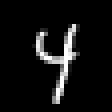

In [6]:
img(x) = convert2image(MNIST, x)
img(X[:, :, i])

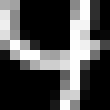

In [7]:
img(X[10:20,10:20, i])

**Frage:** Was zeigt die Ausgabe des vorherigen Befehls? Was sehen Sie, wenn Sie `i` einen anderen Wert zuordnen? Vergleichen Sie jeweils mit der Ausgabe von `Y[i]`.

Jedes Datum `X[:,:,i]` ist eine $28\times 28$ Matrix. Wir definieren zudem folgende Matrizen:

In [8]:
d = 28
dd = 28^2
A = Matrix(1.0I, d, d) 
B = A[1:15, :]
C = A[:, d:-1:1]
D = rand(d, d)
E = rand(dd, dd);

Hierbei ist 

$$ A = \begin{pmatrix} 
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots &\vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 
\end{pmatrix} \in\mathbb R^{d\times d}$$

die sogenannte *Einheitsmatrix*. Es gilt für alle Vektoren $v\in\mathbb R^d$:

$$A v = v.$$

Da die Bilder selbst Matrizen sind, können wir Matrixoperationen mit ihnen anstellen. 

Beachte: Die Bilder sind Zeilenweise enkodiert. Das heisst, dass Matrixmultiplikation von links auf den *Zeilen* der Bilder agiert.

**Frage:** Welcher visuelle Effekt entsteht durch folgende Matrix Operationen und warum? Experimentieren Sie mit verschiedenen `i` und `j`:

In [9]:
i, j = 16, 33
xi, xj = X[:,:,i], X[:,:,j];

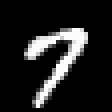

In [10]:
xi |> img

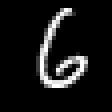

In [11]:
xj |> img

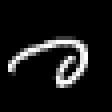

In [12]:
transpose(xj) |> img

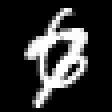

In [13]:
xi + xj |> img

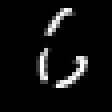

In [14]:
xj - xi |> img

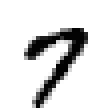

In [15]:
1 .- xi |> img

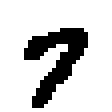

In [16]:
1 ./log.(1.0 .- xi) |> img

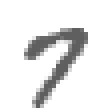

In [17]:
exp.(-xi) |> img

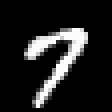

In [18]:
A * xi |> img

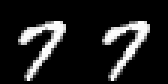

In [19]:
[A; A] * xi |> img

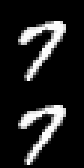

In [20]:
transpose([A; A] * transpose(xi)) |> img

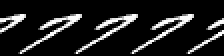

In [21]:
z = zeros(d, d)
for k in 1:d
    xik = xi[:, k]
    z[:, k] = [xik[k+1:d]; xik[1:k]]
end
[A; A; A; A] * z |> img

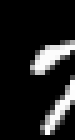

In [22]:
B * xi |> img

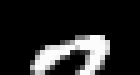

In [23]:
xi * transpose(B) |> img

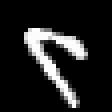

In [24]:
C * xi |> img

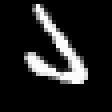

In [25]:
xi * C |> img

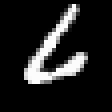

In [26]:
C * xi * C |> img

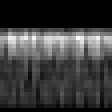

In [27]:
z = D * xi
z ./ maximum(z) |> img

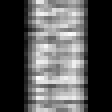

In [28]:
z = xi * transpose(D)
z ./ maximum(z) |> img

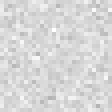

In [29]:
z = reshape(E * vec(xi), 28, 28)
z ./ maximum(z) |> img

Wir definieren zudem folgende Matrix in Abhängigkeit von $s$ und $\sigma$:

In [30]:
function M(s, sigma)
    M = zeros(dd, dd);
    for k in (s+1):dd-s
        M[k, k-s:k+s] = [exp(-i^2/sigma^2) for i in -s:s]
    end
    return M
end

M (generic function with 1 method)

**Frage:** Welchen Effekt hat Multiplikation mit $M$? Visualisieren und diskutieren Sie die folgenden Zeilen.

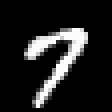

In [31]:
M1 = M(3, 0.1)
z = reshape(M1 * vec(xi), 28, 28)
z ./ maximum(z) |> img

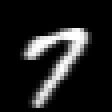

In [32]:
M2 = M(3, 1)
z = reshape(M2 * vec(xi), 28, 28)
z ./ maximum(z) |> img

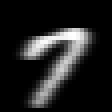

In [33]:
M2 = M(3, 2)
z = reshape(M2 * vec(xi), 28, 28)
z ./ maximum(z) |> img

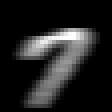

In [34]:
M3 = M(3, 5)
z = reshape(M3 * vec(xi), 28, 28)
z ./ maximum(z) |> img

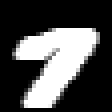

In [35]:
z = reshape(M3 * vec(xi), 28, 28) |> img

# [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) Dataset von [Zalando Research](https://github.com/zalandoresearch):

Der FashionMNIST Datensatz lässt sich wie folgt laden:

In [36]:
X, Y = FashionMNIST()[:];

**Aufgabe:** Betrachten und manipulieren Sie den Datensatz wie zuvor den MNIST Datensatz. 

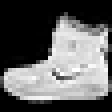

In [37]:
convert2image(FashionMNIST, X[:, :, 1])